# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from newsapi import NewsApiClient
from dotenv import load_dotenv
import nltk as nltk
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [2]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key="a46ac64982fa415ebe391a716963d38e")

In [4]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q="Bitcoin", 
    language="en",
    sort_by="relevancy")

print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

Total articles about Bitcoin: 8643


In [5]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="Ethereum",
    language="en",
    sort_by="relevancy"
)

print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

Total articles about Ethereum: 3167


In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiment = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiment.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiment)

# Reorder DataFrame columns
cols = ["compound", "negative", "neutral", "positive", "text", "date"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,compound,negative,neutral,positive,text,date
0,-0.2732,0.063,0.937,0.000,A similar hoax earlier this year tied Walmart ...,2021-11-05
1,0.3612,0.000,0.904,0.096,Theres a big new presence slurping up power fr...,2021-10-28
2,0.0000,0.000,1.000,0.000,"For all the talk of democratizing finance, the...",2021-10-26
3,0.5719,0.000,0.847,0.153,"In keeping with a previous announcement, AMC t...",2021-11-12
4,0.0000,0.000,1.000,0.000,Representation of cryptocurrency Bitcoin is pl...,2021-10-21


In [7]:
ethereum_sentiment = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiment.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiment)

# Reorder DataFrame columns
cols = ["compound", "negative", "neutral", "positive", "text", "date"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,compound,negative,neutral,positive,text,date
0,0.5719,0.0,0.847,0.153,"In keeping with a previous announcement, AMC t...",2021-11-12
1,0.4588,0.0,0.906,0.094,Ethereum and bitcoin are the two biggest crypt...,2021-11-05
2,0.5267,0.0,0.907,0.093,Elon Musk\r\npicture alliance / Getty Images\r...,2021-11-01
3,0.4588,0.0,0.903,0.097,Cryptocurrency and business continuity line im...,2021-11-01
4,0.4019,0.0,0.924,0.076,Apple CEO Tim Cook said he owns cryptocurrency...,2021-11-09


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.166550,0.005300,0.949000,0.045700
std,0.288800,0.016633,0.065559,0.067315
min,-0.273200,0.000000,0.801000,0.000000
25%,0.000000,0.000000,0.896500,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.463275,0.000000,1.000000,0.103500
max,0.755800,0.063000,1.000000,0.199000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.0,20.000000,20.000000
mean,0.305170,0.0,0.930900,0.069100
std,0.304142,0.0,0.074103,0.074103
min,0.000000,0.0,0.779000,0.000000
25%,0.000000,0.0,0.896000,0.000000
50%,0.381550,0.0,0.926000,0.074000
75%,0.530600,0.0,1.000000,0.104000
max,0.822500,0.0,1.000000,0.221000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    regex = re.compile("[^a-zA-Z ]")
    
    # Remove the punctuation from text
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]

    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    # Remove the stop words
    words = word_tokenize(re_clean)
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df["text"].apply(tokenizer)
bitcoin_df.head()


,compound,negative,neutral,positive,text,date,tokens
0,-0.2732,0.063,0.937,0.000,A similar hoax earlier this year tied Walmart ...,2021-11-05,"[similar, hoax, earlier, year, tied, walmart, ..."
1,0.3612,0.000,0.904,0.096,Theres a big new presence slurping up power fr...,2021-10-28,"[theres, big, new, presence, slurping, power, ..."
2,0.0000,0.000,1.000,0.000,"For all the talk of democratizing finance, the...",2021-10-26,"[talk, democratizing, finance, vast, majority,..."
3,0.5719,0.000,0.847,0.153,"In keeping with a previous announcement, AMC t...",2021-11-12,"[keeping, previous, announcement, amc, theater..."
4,0.0000,0.000,1.000,0.000,Representation of cryptocurrency Bitcoin is pl...,2021-10-21,"[representation, cryptocurrency, bitcoin, plac..."


In [14]:
# Create a new tokens column for Ethereum
ethereum_df['tokens'] = ethereum_df["text"].apply(tokenizer)
ethereum_df.head()

,compound,negative,neutral,positive,text,date,tokens
0,0.5719,0.0,0.847,0.153,"In keeping with a previous announcement, AMC t...",2021-11-12,"[keeping, previous, announcement, amc, theater..."
1,0.4588,0.0,0.906,0.094,Ethereum and bitcoin are the two biggest crypt...,2021-11-05,"[ethereum, bitcoin, two, biggest, cryptocurren..."
2,0.5267,0.0,0.907,0.093,Elon Musk\r\npicture alliance / Getty Images\r...,2021-11-01,"[elon, muskpicture, alliance, getty, imagesa, ..."
3,0.4588,0.0,0.903,0.097,Cryptocurrency and business continuity line im...,2021-11-01,"[cryptocurrency, business, continuity, line, i..."
4,0.4019,0.0,0.924,0.076,Apple CEO Tim Cook said he owns cryptocurrency...,2021-11-09,"[apple, ceo, tim, cook, said, owns, cryptocurr..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
btc_text = ' '.join(bitcoin_df.text)
btc_processed = tokenizer(btc_text)
btc_ngrams = Counter(ngrams(btc_processed, n=2))

In [17]:
# Generate the Ethereum N-grams where N=2
eth_text = ' '.join(ethereum_df.text)
eth_processed = tokenizer(eth_text)
eth_ngrams = Counter(ngrams(eth_processed, n=2))

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
print(dict(btc_ngrams.most_common(10)))

{('reuters', 'bitcoin'): 6, ('illustration', 'taken'): 5, ('cryptocurrency', 'bitcoin'): 4, ('oct', 'reuters'): 4, ('bitcoin', 'seen'): 4, ('picture', 'illustration'): 4, ('char', 'bitcoin'): 4, ('char', 'representation'): 3, ('representation', 'virtual'): 3, ('virtual', 'cryptocurrency'): 3}


In [20]:
# Use token_count to get the top 10 words for Ethereum
print(dict(eth_ngrams.most_common(10)))

{('illustration', 'taken'): 4, ('taken', 'june'): 4, ('new', 'york'): 3, ('bitcoin', 'ethereum'): 3, ('ethereum', 'dogecoin'): 3, ('ethereum', 'bitcoin'): 2, ('representations', 'cryptocurrencies'): 2, ('cryptocurrencies', 'bitcoin'): 2, ('dogecoin', 'ripple'): 2, ('ripple', 'litecoin'): 2}


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

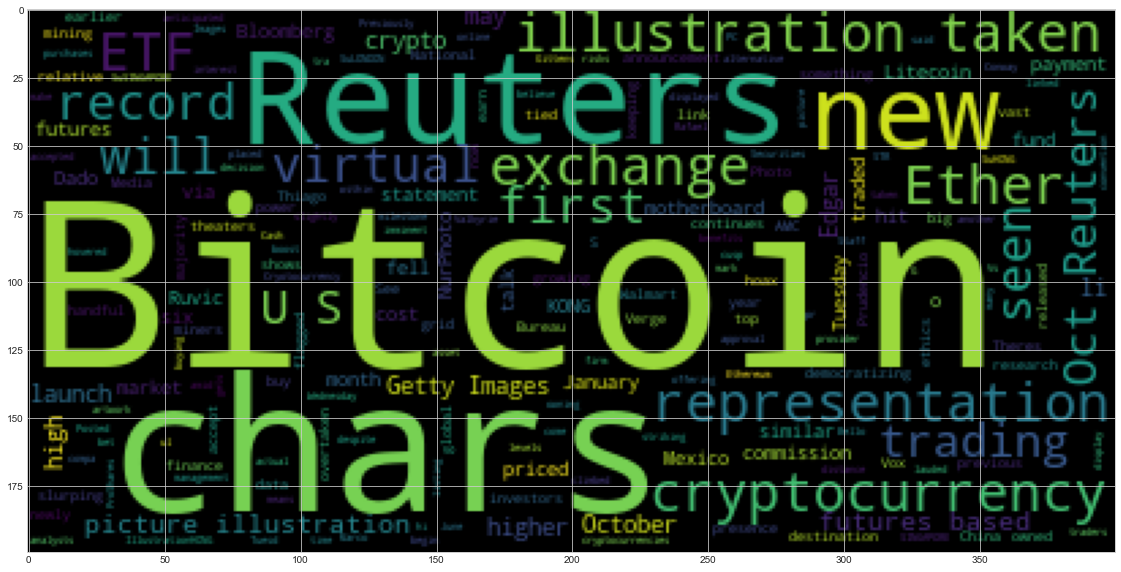

In [22]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(btc_text)
plt.imshow(btc_wc);

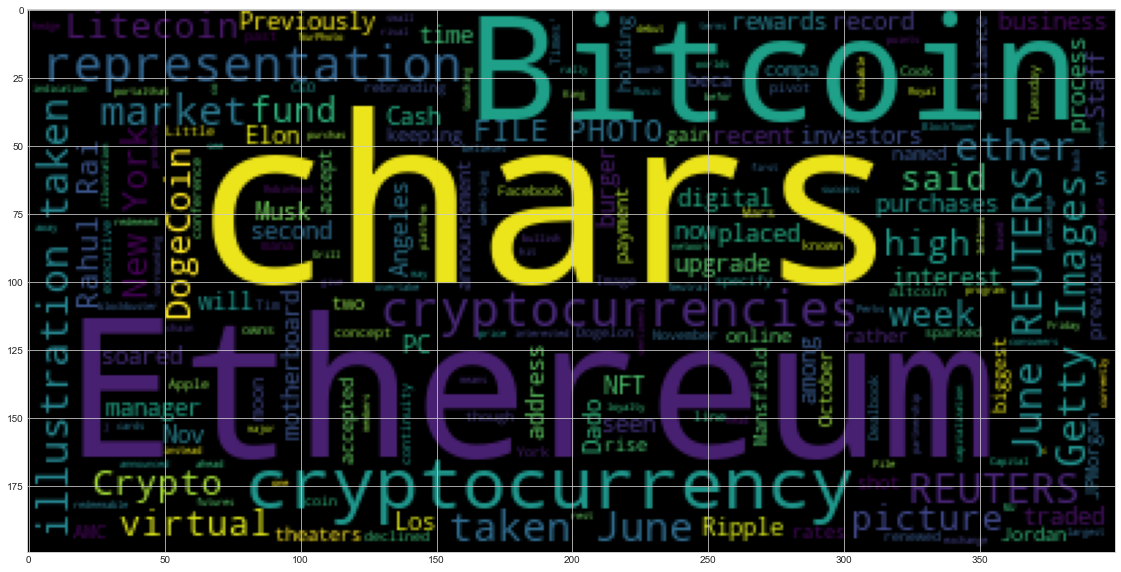

In [23]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(eth_text)
plt.imshow(eth_wc);

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [26]:
# Concatenate all of the Bitcoin text together
btc_text = ' '.join(bitcoin_df.text)
btc_text

'A similar hoax earlier this year tied Walmart to Litecoin\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\nPhoto Illustration by Thiago Prudencio/S… [+1900 chars] Theres a big new presence slurping up power from the U.S. grid, and its growing: bitcoin miners. New research shows that the U.S. has overtaken China as the top global destination for bitcoin mining … [+3088 chars] For all the talk of democratizing finance, the vast majority of Bitcoin continues to be owned by a relative handful of investors.\r\nAs flagged by Bloomberg, newly released data by the National Bureau … [+4274 chars] In keeping with a previous announcement, AMC theaters now accept cryptocurrencies as payment for online purchases.\xa0\r\nBitcoin, Ethereum, Bitcoin Cash and Litecoin are accepted.\xa0\r\nPreviously, the compa… [+1036 chars] Representation of cryptocurrency Bitcoin is placed on PC motherboard in this illustration taken, June 29, 2021. REUTERS/Dad

In [27]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_text)

# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin NER"

In [28]:
# Render the visualization
displacy.render(btc_doc, style="ent")

In [32]:
# List all Entities
for ent in btc_doc.ents:
    print(ent.text, ent.label_)

earlier this year DATE
Verge ORG
Vox Media ORG
Thiago Prudencio/S PERSON
U.S. GPE
U.S. GPE
China GPE
Bitcoin ORG
Bloomberg ORG
the National Bureau ORG
AMC ORG
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationHONG KONG ORG
Oct 21 DATE
Reuters ORG
October 19, 2021 DATE
REUTERS ORG
Edgar SuLONDON PERSON
Oct 20 DATE
Reuters ORG
October 19, 2021 DATE
REUTERS ORG
Edgar SuHONG KONG PERSON
Oct 20 DATE
Reuters ORG
Wednesday DATE
first ORDINAL
U.S. GPE
Conway G. Gittens PERSON
October 18, 2021 DATE
REUTERS ORG
Edgar SuSINGAPORE PERSON
Oct 19 DATE
Reuters ORG
six-month DATE
Reuters ORG
Reuters ORG
six-month DATE
Tuesday DATE
U.S. GPE
NurPhoto ORG
Getty Images ORG
first ORDINAL
Tuesday DATE
ProShares PERSON
2021 DATE
Marco Bello PERSON
The Securities and Exchange Commission ORG
Valkyrie PERSON
ETF ORG
NurPhoto ORG
ETF ORG
>Bloomberg PERSON
first ORDINAL
ETF ORG
Rafael Henrique PERSON
Getty Images
 ORG
7% PERCENT
Monday DATE
morning TIME
around $66,105 MONEY
3% PERCENT
4,722 MONEY
over 9% PERC

---

### Ethereum NER

In [33]:
# Concatenate all of the Ethereum text together
eth_text = ' '.join(ethereum_df.text)
eth_text

'In keeping with a previous announcement, AMC theaters now accept cryptocurrencies as payment for online purchases.\xa0\r\nBitcoin, Ethereum, Bitcoin Cash and Litecoin are accepted.\xa0\r\nPreviously, the compa… [+1036 chars] Ethereum and bitcoin are the two biggest cryptocurrencies.\r\nJordan Mansfield /Getty Images\r\nCrypto investors should be holding ethereum rather than bitcoin as interest rates rise, JPMorgan said, beca… [+2957 chars] Elon Musk\r\npicture alliance / Getty Images\r\nA cryptocurrency named after Elon Musk has shot to the moon with a 3,780% gain in October. \r\nDogelon Mars traded at $0.00000229 on November 1, up from $0.0… [+1533 chars] Cryptocurrency and business continuity line image for business concept.\r\nGetty Images\r\nLittle-known altcoin mana soared in the past week after Facebook\'s rebranding pivot sparked renewed interest in … [+1338 chars] Apple CEO Tim Cook said he owns cryptocurrency, though he declined to specify which virtual coin.\r\nDuring The Ne

In [34]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_text)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [35]:
# Render the visualization
displacy.render(eth_doc, style="ent")

In [36]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

AMC ORG
two CARDINAL
Jordan Mansfield PERSON
JPMorgan ORG
Elon Musk PERSON
Getty Images ORG
Elon Musk PERSON
3,780% PERCENT
October DATE
Dogelon Mars PRODUCT
0.00000229 MONEY
November 1 DATE
0.0 MONEY
Getty Images ORG
the past week DATE
Apple ORG
Tim Cook PERSON
The New York Times' ORG
Tuesday DATE
1-2% PERCENT
NurPhoto PERSON
first ORDINAL
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/Illustration/File Photo MU ORG
Burger King ORG
Robinhood GPE
Bitcoin , Ethereum and Dogecoin ORG
Royal Perks ORG
5 MONEY
Rahul Rai PERSON
Market Neutral ORG
BlockTower Capital ORG
Rahul Rai PERSON
Rahul Rai PERSON
second ORDINAL
4,400 MONEY
Friday DATE
Ethereum PERSON
Bitcoin’s ORG
second ORDINAL
NEW YORK GPE
Nov 8 DATE
Reuters ORG
a record $6.4 billion MONEY
this year DATE
CoinShares ORG
American Airlines ORG
Airbus ORG
A321-200 PRODUCT
Los Angeles International GPE
Los Angeles GPE
California GPE
U.S. GPE
March 28, 2018 DATE
REUTERS ORG
Mike Blake/File PERSON
Nov 16 DATE
Reute ORG
Thursday DATE
6:13 p.m. TI

---